In [1]:
include("dqn.jl")

┌ Info: Recompiling stale cache file /data/scratch/deniz/.julia/compiled/v1.0/ArgParse/apuSZ.ji for ArgParse [c7e460c6-2fb9-53a9-8c5b-16f535851c63]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /data/scratch/deniz/.julia/compiled/v1.0/Knet/f4vSz.ji for Knet [1902f260-5fb4-5aff-8c31-6271790ab950]
└ @ Base loading.jl:1184


Main.DQN

In [2]:
@doc DQN

julia dqn.jl

This example implements the DQN algorithm from  `Playing atari with deep reinforcement learning.` Mnih, V., Kavukcuoglu, K., Silver, D., Graves, A., Antonoglou, I., Wierstra, D., & Riedmiller, M. (2013).  arXiv preprint arXiv:1312.5602.


In [3]:
DQN.main("--help")

usage: <PROGRAM> [--frames FRAMES] [--lr LR] [--gamma GAMMA]
                 [--hiddens HIDDENS [HIDDENS...]] [--env_id ENV_ID]
                 [--render] [--memory MEMORY] [--bs BS]
                 [--stack STACK] [--save SAVE] [--load LOAD]
                 [--usegpu] [--play] [--printinfo]

(c) Ozan Arkan Can, 2018. An implementation of the deep q network.

optional arguments:
  --frames FRAMES       number of frames (type: Int64, default: 100)
  --lr LR               learning rate (type: Float64, default: 0.001)
  --gamma GAMMA         discount factor (type: Float64, default: 0.99)
  --hiddens HIDDENS [HIDDENS...]
                        number of units in the hiddens for the mlp
                        (type: Int64, default: [32])
  --env_id ENV_ID        (default: "CartPole-v0")
  --render
  --memory MEMORY       memory size (type: Int64, default: 1000)
  --bs BS               batch size (type: Int64, default: 32)
  --stack STACK         length of the frame history (type: Int6

In [4]:
DQN.main("--frames 100 --printinfo");

Frame: 13 , Total reward: 13.0, Exploration Rate: 0.4149999999999999
Frame: 26 , Total reward: 13.0, Exploration Rate: 0.1
Frame: 36 , Total reward: 10.0, Exploration Rate: 0.1
Frame: 46 , Total reward: 10.0, Exploration Rate: 0.1
Frame: 56 , Total reward: 10.0, Exploration Rate: 0.1
Frame: 67 , Total reward: 11.0, Exploration Rate: 0.1
Frame: 77 , Total reward: 10.0, Exploration Rate: 0.1
Frame: 87 , Total reward: 10.0, Exploration Rate: 0.1
Frame: 97 , Total reward: 10.0, Exploration Rate: 0.1


In [5]:
rewards, frames = DQN.main("--frames 30000 --memory 5000");

In [6]:
include("dqn_with_target.jl")

Main.DQNWITHTARGET

In [7]:
@doc DQNWITHTARGET

julia dqn*with*target.jl

This example implements the DQN algorithm from  `Playing atari with deep reinforcement learning.` Mnih, V., Kavukcuoglu, K., Silver, D., Graves, A., Antonoglou, I., Wierstra, D., & Riedmiller, M. (2013).  arXiv preprint arXiv:1312.5602. It also shows the usage of a target network for the target q value predictions.


In [8]:
DQNWITHTARGET.main("--help")

usage: <PROGRAM> [--frames FRAMES] [--lr LR] [--gamma GAMMA]
                 [--hiddens HIDDENS [HIDDENS...]] [--env_id ENV_ID]
                 [--render] [--memory MEMORY] [--bs BS]
                 [--stack STACK] [--save SAVE] [--load LOAD]
                 [--usegpu] [--play] [--printinfo] [--tupdate TUPDATE]

(c) Ozan Arkan Can, 2018. An implementation of the deep q network with
a target network.

optional arguments:
  --frames FRAMES       number of frames (type: Int64, default: 100)
  --lr LR               learning rate (type: Float64, default: 0.001)
  --gamma GAMMA         discount factor (type: Float64, default: 0.99)
  --hiddens HIDDENS [HIDDENS...]
                        number of units in the hiddens for the mlp
                        (type: Int64, default: [32])
  --env_id ENV_ID        (default: "CartPole-v0")
  --render
  --memory MEMORY       memory size (type: Int64, default: 1000)
  --bs BS               batch size (type: Int64, default: 32)
  --stack STACK      

In [9]:
rewards_tup100, frames_tup100 = DQNWITHTARGET.main("--frames 30000 --memory 5000 --tupdate 100");

In [10]:
rewards_tup500, frames_tup500 = DQNWITHTARGET.main("--frames 30000 --memory 5000 --tupdate 500");

In [13]:
using Plots; default(fmt=:png)

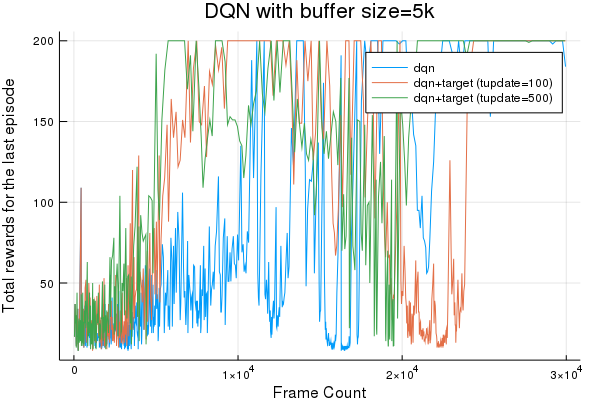

In [12]:
plot(frames, rewards, title="DQN with buffer size=5k", xlabel="Frame Count", ylabel="Total rewards for the last episode", label="dqn")
plot!(frames_tup100, rewards_tup100, xlabel="Frame Count", ylabel="Total rewards for the last episode", label="dqn+target (tupdate=100)")
plot!(frames_tup500, rewards_tup500, xlabel="Frame Count", ylabel="Total rewards for the last episode", label="dqn+target (tupdate=500)")